# Clustering Countries 
### - OBJECTIVE
- To categorise countries using socio-eonomic and health factors that determine the overall development of the country
- Then, based upon the countries which have been categorised figure out the countries that are in **need of health and socio - economic help.**

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import math
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
df_raw = pd.read_csv(r"Country-data.csv")

In [5]:
df_raw

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### The above dataset corresponds to an **unsupervised learning** problem as there is no target feature involved.
- The model employed in forming clusters is going to be **K-Means Clustering**.
- **'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp'** are all the features that will form the basis of our clusters.

In [6]:
df_raw.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
data_dict = pd.read_csv(r"data-dictionary.csv")

In [8]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [9]:
df_raw.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
# pearson coeff of correlation
df_raw.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


# Missing Values

In [11]:
df_raw.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [12]:
d = {}  # no of nans, nones, etc.
for c in df_raw.columns:
    data = df_raw[c]
    d[c] = 0
    for k in data:
        if(k == np.nan or k == None or k == 0):
            d[c] = d.get(c, 0)+1
print("Missing values for the data set\n")
for i, j in d.items():
    print(i, ":", j)

Missing values for the data set

country : 0
child_mort : 0
exports : 0
health : 0
imports : 0
income : 0
inflation : 0
life_expec : 0
total_fer : 0
gdpp : 0


- The above code shows that there are **no missing** values in the given data set.
- We can now go further with the analysis of our features of the data set.

# Analysis
- Since the objective of our cluster analysis is to group countries based on their respective develpment rates, a good way to **define development of a country** can be on the basis of **health, income and GDP per capita**.
- This is derived from the fact that if the **GDP per capita is high** it inturn means that **exports are high** and **imports are lower**
- Also, if the **health expenditure** of a country is high **a drop in mortality rate** is bound to follow.
- - Similarly, in a developed country, **GDP per capita is expected to be high** if **fertility rate is high** and **mortality rate is low**

## Health and Income

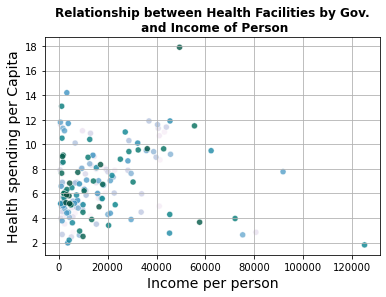

In [13]:
sns.scatterplot(x=df_raw.income, y=df_raw.health,
                hue=df_raw.country, palette='PuBuGn', legend=False, alpha=0.8)
plt.grid()
plt.xlabel("Income per person", fontsize=14)
plt.ylabel("Health spending per Capita", fontsize=14)
plt.title("Relationship between Health Facilities by Gov.\n and Income of Person",
          fontweight='bold')
plt.savefig(r'EDA scatter Plots/health_and_income.png', dpi=200)

- From the above plot it is noted that although a country may have a *lower* health expenditure by the Gov. but if the average income of the country is *high* then they would not be much dependent on the Gov. provided facilities and may look at private options.
- Thus a new column **income and health** is created which is formed by multiplying the income of a person with the health expenditure spent per capita and the plot with **GDP per capita** shows an almost linear relationship.

In [14]:
df_raw['income_and_health'] = df_raw['health']*df_raw['income']

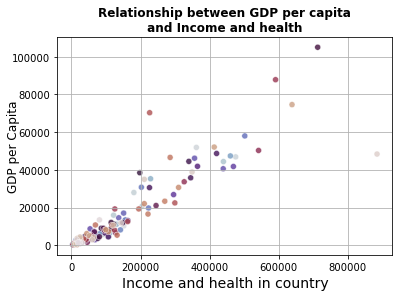

In [15]:
sns.scatterplot(x=df_raw.income_and_health, y=df_raw.gdpp,
                hue=df_raw.country, palette='twilight', legend=False, alpha=0.8)
plt.grid()
plt.xlabel("Income and health in country", fontsize=14)
plt.ylabel("GDP per Capita", fontsize=12, labelpad=-8)
plt.title("Relationship between GDP per capita\n and Income and health ",
          fontweight='bold')
plt.savefig(r'EDA scatter Plots/GDPp_income_health.png', dpi=200)

- This means, the variable $income\times health$ is a good indicator of the development of a country

## Imports and Exports
- Another observation noted is that **Exports/Imports** ratio of a country is a good metric to define development
- The combined effect of **exports and imports** would be high when exports are high and imports are low meaning that the country is capable of production *beyond its local needs* and very less amount of imports means they are only importing goods that are *exclusive* to other countries

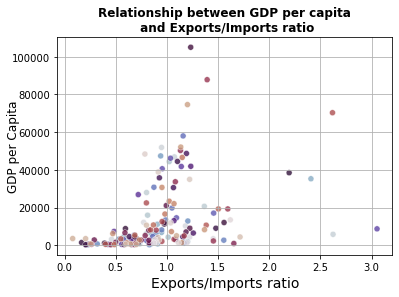

In [16]:
sns.scatterplot(x=df_raw.exports / df_raw.imports, y=df_raw.gdpp,
                hue=df_raw.country, palette='twilight', legend=False, alpha=0.8)
plt.grid()
plt.xlabel("Exports/Imports ratio", fontsize=14)
plt.ylabel("GDP per Capita", fontsize=12, labelpad=-8)
plt.title("Relationship between GDP per capita\n and Exports/Imports ratio",
          fontweight='bold')
plt.savefig(r'EDA scatter Plots/GDPp_export_import.png', dpi=200)

In [17]:
df_raw['exports/imports'] = df_raw['exports'] / df_raw['imports']

# Child Mortality and Total Fertility

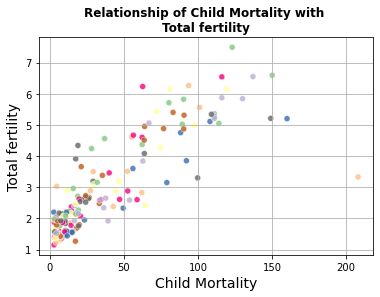

In [18]:
sns.scatterplot(x=df_raw.child_mort, y=df_raw.total_fer,
                hue=df_raw.country, palette='Accent', legend=False, alpha=0.8)
plt.title("Relationship of Child Mortality with \nTotal fertility",
          fontweight='bold')
plt.xlabel("Child Mortality", fontsize=14)
plt.ylabel("Total fertility", fontsize=14)
plt.grid()
plt.savefig(r'EDA scatter Plots/fert_and_mortality.png', dpi=200)

- This relationship is an unsual relationship which highlights the fact that the countries where the mortality rate of children under 5 years is high, people are having **a greater number of children**.
- Although this relationship reveals a mindset that people are afraid that their offspring would succumb and hence they give birth to more number of children.
- Moreover, the second graph shows clearly that the mortality rate and the total fertility fall **exponentialy** with the increasing health expenditure and increasing income.
- So, a better **alternative** to having more children to would be to increase expenditure in health and the income of people in the country. 

In [19]:
df_raw['fertility_by_mortality'] = df_raw['total_fer'] / df_raw['child_mort']

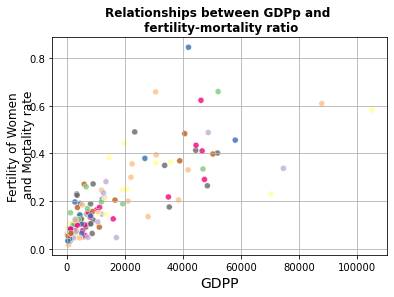

In [20]:
sns.scatterplot(x=df_raw.gdpp, y=df_raw.fertility_by_mortality,
                hue=df_raw.country, palette='Accent', legend=0, alpha=0.8)
plt.xlabel("GDPP", fontsize=14)
plt.ylabel("Fertility of Women\n and Mortality rate", fontsize=12, labelpad=-6)
plt.title("Relationships between GDPp and \n fertility-mortality ratio",
          fontweight='bold')
plt.grid()
plt.savefig(r'EDA scatter Plots/GDPp_fert_and_mort.png', dpi=200)

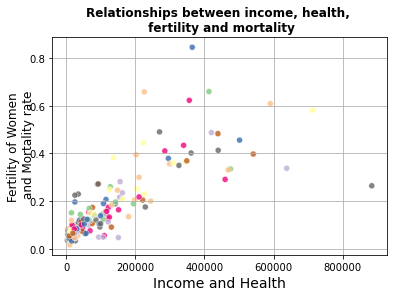

In [21]:
sns.scatterplot(x=df_raw.income_and_health, y=df_raw.fertility_by_mortality,
                hue=df_raw.country, palette='Accent', legend=0, alpha=0.8)
plt.xlabel("Income and Health", fontsize=14)
plt.ylabel("Fertility of Women\n and Mortality rate", fontsize=12, labelpad=-6)
plt.title("Relationships between income, health, \n fertility and mortality",
          fontweight='bold')
plt.grid()
plt.savefig(
    r'EDA scatter Plots/income_health_fert_and_mort.png', dpi=200)

## Reducing Attributes
- (Income, health), (exports,imports) and (total_fertility,child_mortality) attributes are removed
- The interaction terms which are relevant to the developments profile of the country have been added

In [22]:
df_raw = df_raw.drop(['child_mort', 'exports', 'imports',
                     'total_fer', 'income', 'health'], axis=1)
df_raw.describe()

,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7.781832,70.555689,12964.155689,123673.440419,0.923072,0.170445
std,10.570704,8.893172,18328.704809,154521.492565,0.444450,0.149650
min,-4.210000,32.100000,231.000000,3534.240000,0.079137,0.016010
25%,1.810000,65.300000,1330.000000,17516.400000,0.649111,0.064923
50%,5.390000,73.100000,4660.000000,65041.500000,0.893258,0.112565
75%,10.750000,76.800000,14050.000000,152947.000000,1.133605,0.216767
max,104.000000,82.800000,105000.000000,884260.000000,3.052910,0.846154


In [23]:
df_raw.corr()

,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
inflation,1.000000,-0.239705,-0.221631,-0.258342,0.217699,-0.289018
life_expec,-0.239705,1.000000,0.600089,0.625066,0.306512,0.673599
gdpp,-0.221631,0.600089,1.000000,0.921149,0.383750,0.802713
income_and_health,-0.258342,0.625066,0.921149,1.000000,0.282510,0.790312
exports/imports,0.217699,0.306512,0.383750,0.282510,1.000000,0.219827
fertility_by_mortality,-0.289018,0.673599,0.802713,0.790312,0.219827,1.000000


# Making the model 
- KMeans algorithm is imported from skleran library and StandardScaler is used for the scaling of data.
- Scaling of data is an important here as the K- means algorithm is a distance based algorithm and **varied distance values** can influence the results.

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

- Country name is dropped from the data set as it bears **no real significance to the development of a country**
- Moreover,it is a **categorical variable** which otherwise also could not have been used as a distance metric, even if it was one-hot encoded.

In [25]:
df = df_raw.drop('country', axis=1)

In [26]:
df.head(n=2)

,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
0,9.44,56.2,553,12203.8,0.222717,0.064523
1,4.49,76.3,4090,65041.5,0.576132,0.099398


### Scale and save dataframe

In [27]:
st = StandardScaler()
train = pd.DataFrame(st.fit_transform(df), columns=df.columns)

In [28]:
train.head()

,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
0,0.157336,-1.619092,-0.679180,-0.723556,-1.580519,-0.709924
1,-0.312347,0.647866,-0.485623,-0.380583,-0.782954,-0.476184
2,0.789274,0.670423,-0.465376,-0.453598,0.676702,-0.432865
3,1.387054,-1.179234,-0.516268,-0.693624,1.194138,-0.795436
4,-0.601749,0.704258,-0.041817,-0.055177,-0.339811,0.243637


In [29]:
train.to_csv(r"final_country_data.csv")

# Metrics 
- **INERTIA** and **Davies- Bouldin Index** were used as the metrics to measure the optimality of clusters.
- Both the metrics are should be minimized for **formation of optimal** clusters.

# Inertia 
- It is defined as the **intracluster distance**  for the cluster.
- The attribute **model.inertia_** provides the total inertia of the model summed up over **all the clusters**

In [30]:
train = pd.read_csv(r"final_country_data.csv").drop(['Unnamed: 0'], axis=1)

In [31]:
train.head(n=2)

,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
0,0.157336,-1.619092,-0.679180,-0.723556,-1.580519,-0.709924
1,-0.312347,0.647866,-0.485623,-0.380583,-0.782954,-0.476184


In [70]:
!git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 5.62 KiB | 2.81 MiB/s, done.
From https://github.com/TheGupta2012/Clustering-Countries
   c0b6f4e..072fe1b  master     -> origin/master
Updating c0b6f4e..072fe1b
Fast-forward
 download.png | Bin 0 -> 5114 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 download.png


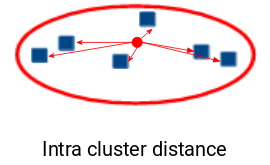

In [71]:
Image(r"Metrics and Score Plots/inertia_img.png")

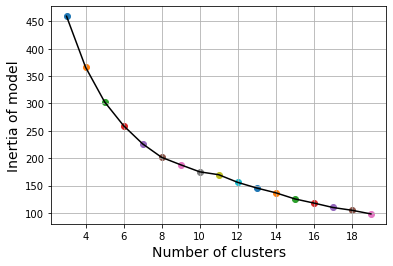

In [33]:
inert = []
for i in range(3, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=400)
    km.fit(train)
    plt.scatter(i, km.inertia_)
    inert.append(km.inertia_)
plt.plot([i for i in range(3, 20)], inert, color='black')
plt.grid()
plt.xlabel("Number of clusters", fontsize=14)
plt.ylabel("Inertia of model", fontsize=14)
plt.savefig(r'Metrics and Score Plots/inertia.png', dpi=200)

# Davies - Bouldin Index
- This index looks to **minimize** the ratio of **maximum (intracluster-distances with inter-cluster distances)** for **all the pairs of clusters averaged over all clusters.**
- It is import from **sklearn.metrics** as **davies_bouldin_score**
- A detailed description is provided **in the pdf file attached.**

In [34]:
from sklearn.metrics import davies_bouldin_score

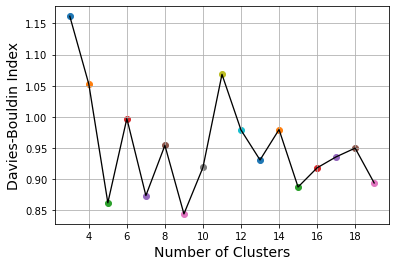

In [35]:
dbi = []
for i in range(3, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=400)
    km.fit(train)
    plt.scatter(i, davies_bouldin_score(train, km.labels_))
    dbi.append(davies_bouldin_score(train, km.labels_))
plt.plot([i for i in range(3, 20)], dbi, color='black', linewidth=1.3)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Davies-Bouldin Index", fontsize=14)
plt.grid()
plt.savefig(r'Metrics and Score Plots/davies_bouldin_score.png', dpi=200)

- We see that the **DBI** is minimum for number of clusters = 6.


### Plotting Product of DBI and Inertia

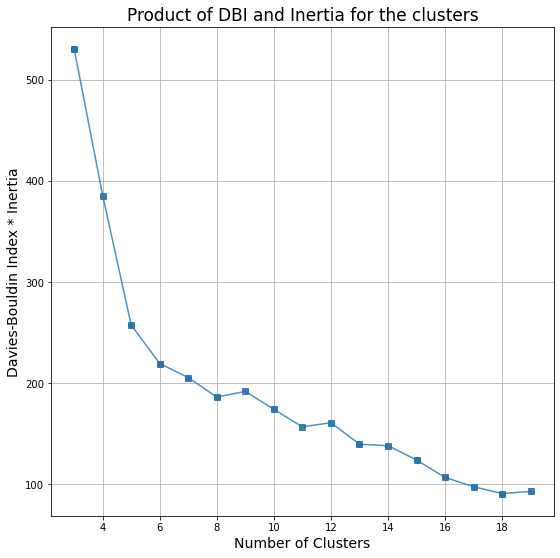

In [36]:
dbi_inertia = []
plt.figure(figsize=(9, 9))

for i in range(3, 20):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=400)
    km.fit(train)

    dbi = davies_bouldin_score(train, km.labels_)
    inertia = km.inertia_
    dbi_inertia.append(dbi*inertia)
    plt.scatter(i, dbi*inertia)


plt.plot([i for i in range(3, 20)], dbi_inertia,
         marker='s', alpha=0.8, linewidth=1.5)
plt.title('Product of DBI and Inertia for the clusters', fontsize=17)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Davies-Bouldin Index * Inertia", fontsize=14)
plt.grid()
plt.savefig(r'Metrics and Score Plots/DBI_and_inertia.png', dpi=200)

# Final Model
- The final model that is used has-
 - **Clusters**- 7
 - **Initialization Algorithm**- KMeans ++
 - **Max- Iterations**- 400
 - **Distance Metric**- Euclidean

In [37]:
km = KMeans(n_clusters=7, init='k-means++', max_iter=400)
km.fit(train)

KMeans(max_iter=400, n_clusters=7)

In [38]:
davies_bouldin_score(train, km.labels_)

0.9160192200293632

In [39]:
km.inertia_

226.4859017057867

In [40]:
km.labels_

array([1, 2, 6, 6, 2, 6, 2, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2, 1, 2, 6, 2, 1,
       2, 3, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 6, 2, 1, 2, 0, 0,
       5, 2, 2, 2, 2, 6, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1,
       1, 2, 0, 1, 6, 6, 6, 0, 0, 0, 2, 0, 2, 6, 1, 1, 3, 1, 1, 2, 2, 1,
       1, 6, 2, 5, 2, 1, 1, 2, 2, 1, 2, 6, 2, 1, 1, 6, 2, 2, 1, 6, 1, 1,
       5, 0, 1, 4, 5, 6, 1, 2, 2, 2, 2, 2, 0, 3, 2, 6, 1, 2, 6, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 0, 0, 6, 2, 6, 6, 0, 5, 1, 1, 2, 1, 1, 2, 2, 2,
       6, 1, 6, 2, 0, 5, 2, 6, 1, 6, 2, 6, 1], dtype=int32)

In [41]:
clusters = pd.DataFrame(km.cluster_centers_, columns=train.columns)

In [42]:
label_dict = dict()
for i, j in zip(km.labels_, df_raw.country):
    if(i not in label_dict):
        label_dict[i] = []
    label_dict[i].append(j)
print("CLUSTERED COUNTRIES")
for k, j in label_dict.items():
    print("Label ", k, ":", j)
    print()

CLUSTERED COUNTRIES
Label  1 : ['Afghanistan', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Fiji', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Micronesia, Fed. Sts.', 'Moldova', 'Mozambique', 'Namibia', 'Nepal', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Vanuatu', 'Zambia']

Label  2 : ['Albania', 'Antigua and Barbuda', 'Armenia', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Georgia', 'Grenada', 'Guatemala', 'Hu

In [43]:
clusters.sort_values('income_and_health')

,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
1,0.000591,-1.197188,-0.634395,-0.680472,-0.753107,-0.718446
4,9.129718,-1.134121,-0.581936,-0.633286,1.198220,-0.841291
6,1.002691,-0.089741,-0.346630,-0.361140,0.794303,-0.424481
2,-0.324632,0.467995,-0.257740,-0.192470,-0.186177,-0.092545
3,0.500443,0.316281,1.027367,0.236979,3.736986,-0.173359
0,-0.648222,1.153923,1.356245,1.421225,0.212357,1.826134
5,-0.498402,1.129078,3.158585,3.382524,0.512596,1.815088


- The cluster Data Frame is sorted according to the **income and health product**.
- According to the **cluster dataframe**, it is noted that the countries clustered around **labels 3 and 1** had the **lowest cluster income and GDP percapita**.
- It was also noted that those countries had the **highest fertility and mortality product** which made them candidates that would actually require **external socio - economic help**

# Making new Dataframe for Cluster

### - Clusters 1 and 4
- This cluster represents the **most in need countries amongst the data set**.
- This cluster is now analysed according to different variables and the **top 20** countries are extracted out of it on this basis.

In [44]:
countries = label_dict[1]

# adding nigeria too...
countries.append("Nigeria")
df_label = pd.DataFrame(columns=df_raw.columns)
df_new = pd.DataFrame(columns=df_raw.columns)
for c in df_raw.country:
    if(c in countries):
        df_label = df_label.append(df_raw.loc[df_raw.country == c])
    else:
        df_new = df_new.append(df_raw.loc[df_raw.country == c])

# Clustered Countries

In [45]:
df_label.head()

,country,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
0,Afghanistan,9.440,56.2,553,12203.8,0.222717,0.064523
17,Benin,0.885,61.8,758,7462.0,0.639785,0.048288
21,Botswana,8.920,57.1,6350,110390.0,0.849903,0.054857
25,Burkina Faso,6.810,57.9,575,9638.2,0.648649,0.050603
26,Burundi,12.300,57.7,231,8862.4,0.227551,0.066880


# Other countries

In [46]:
df_new

,country,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
1,Albania,4.49,76.3,4090,65041.5,0.576132,0.099398
2,Algeria,16.10,76.5,4460,53793.0,1.222930,0.105861
3,Angola,22.40,60.1,3530,16815.0,1.452214,0.051765
4,Antigua and Barbuda,1.44,76.8,12200,115173.0,0.772496,0.206796
5,Argentina,20.90,75.8,10300,151470.0,1.181250,0.163448
...,...,...,...,...,...,...,...
160,Uruguay,4.91,76.4,11900,142785.0,1.035433,0.196226
161,Uzbekistan,16.50,68.8,1380,24634.4,1.112281,0.064463
163,Venezuela,45.90,75.4,13500,81015.0,1.619318,0.144444
164,Vietnam,12.10,73.1,1310,30711.6,0.897756,0.083691


In [47]:
df_label.gdpp = df_label.gdpp.astype(float, copy=True)

In [48]:
df_new.gdpp = df_new.gdpp.astype(float, copy=True)

In [49]:
df_label.describe()

,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
count,50.000000,50.0000,50.00000,50.000000,50.000000,50.000000
mean,9.712300,59.9520,1390.56000,18986.495000,0.606650,0.062885
std,14.677503,6.7292,1514.82143,21647.651334,0.286871,0.023685
min,0.885000,32.1000,231.00000,3534.240000,0.079137,0.016010
25%,3.620000,56.8750,555.25000,8960.925000,0.405824,0.047915
50%,6.600000,60.6000,777.50000,12589.350000,0.635682,0.057918
75%,11.050000,65.1250,1340.00000,17653.500000,0.770123,0.071059
max,104.000000,71.1000,7280.00000,110390.000000,1.454023,0.150890


In [50]:
df_new.describe()

,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,6.956846,75.087179,17910.136752,168411.451282,1.058294,0.216411
std,8.161523,4.987425,19934.005577,165009.390657,0.431646,0.157142
min,-4.210000,60.100000,758.000000,7328.400000,0.205638,0.037422
25%,1.160000,72.100000,4340.000000,50596.800000,0.800915,0.104564
50%,4.080000,75.800000,9070.000000,114848.000000,0.986877,0.163448
75%,9.810000,79.500000,26900.000000,223004.000000,1.186544,0.281818
max,45.900000,82.800000,105000.000000,884260.000000,3.052910,0.846154


# Comparison of Income and health

In [51]:
df_label.sort_values("income_and_health", ascending=1)[:12]

,country,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
31,Central African Republic,2.010,47.5,446.0,3534.24,0.445283,0.034966
50,Eritrea,11.600,61.7,482.0,3777.20,0.205579,0.083514
112,Niger,2.550,58.8,348.0,4200.24,0.452138,0.060894
106,Mozambique,7.640,54.5,419.0,4782.78,0.681818,0.055050
37,"Congo, Dem. Rep.",20.800,57.5,334.0,4817.19,0.828629,0.056379
93,Madagascar,8.790,60.8,413.0,5240.30,0.581395,0.073955
63,Guinea,16.100,58.0,648.0,5866.70,0.701389,0.048991
36,Comoros,3.870,65.9,769.0,6359.10,0.319149,0.053855
94,Malawi,12.100,53.1,459.0,6787.70,0.653295,0.058674
17,Benin,0.885,61.8,758.0,7462.00,0.639785,0.048288


In [52]:
print("Income and Health Statistics ")
df_new.income_and_health.describe()

Income and Health Statistics 


count       117.000000
mean     168411.451282
std      165009.390657
min        7328.400000
25%       50596.800000
50%      114848.000000
75%      223004.000000
max      884260.000000
Name: income_and_health, dtype: float64

- It is evident that the **income and health product** of the other dataframe that the **countries of this cluster** are very far behind it terms of both **income and health facilities** as the mean income and health of this cluster approximately **10%** of the other countries.

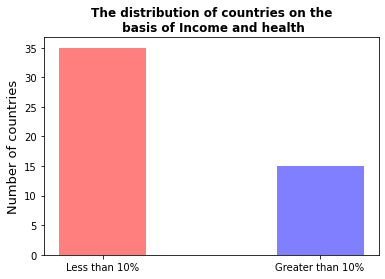

In [59]:
dat = dict()
# get 10% level
level = 0.1 * np.mean(df_new.income_and_health)

for k in df_label.income_and_health:
    if(k < level):
        dat['Less than 10%'] = dat.get('Less than 10%', 0)+1
    else:
        dat['Greater than 10%'] = dat.get('Greater than 10%', 0)+1
plt.bar([0, 0.5], [dat['Less than 10%'], dat['Greater than 10%']],
        width=0.2, alpha=0.5, color=['r','b'])
plt.xticks([0, 0.5], ['Less than 10%', 'Greater than 10%'])
plt.ylabel("Number of countries", fontsize=13)
plt.title("The distribution of countries on the\n basis of Income and health",
          fontweight='bold')
plt.savefig(r'Final Cluster Histograms/histo_income_health.png', dpi=200)

# Comparison of GDP per capita

In [54]:
df_label.sort_values("gdpp", ascending=True)[:15]

,country,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
26,Burundi,12.30,57.7,231.0,8862.40,0.227551,0.066880
88,Liberia,5.47,60.8,327.0,8260.00,0.206263,0.056215
37,"Congo, Dem. Rep.",20.80,57.5,334.0,4817.19,0.828629,0.056379
112,Niger,2.55,58.8,348.0,4200.24,0.452138,0.060894
132,Sierra Leone,17.20,55.0,399.0,15982.00,0.486957,0.032500
93,Madagascar,8.79,60.8,413.0,5240.30,0.581395,0.073955
106,Mozambique,7.64,54.5,419.0,4782.78,0.681818,0.055050
31,Central African Republic,2.01,47.5,446.0,3534.24,0.445283,0.034966
94,Malawi,12.10,53.1,459.0,6787.70,0.653295,0.058674
50,Eritrea,11.60,61.7,482.0,3777.20,0.205579,0.083514


In [60]:
print("GDP per capita statistics")
(df_new.gdpp.describe())

GDP per capita statistics


count       117.000000
mean      17910.136752
std       19934.005577
min         758.000000
25%        4340.000000
50%        9070.000000
75%       26900.000000
max      105000.000000
Name: gdpp, dtype: float64

- The above statistic is derived from the **other dataframe** and highlights the **enormous disparity** between countries **in the cluster and other countries on average.**
- The mean for this dataset is **$16738$** and approximately 42 countries have a GDPP below the 10% mark of the meanother countries

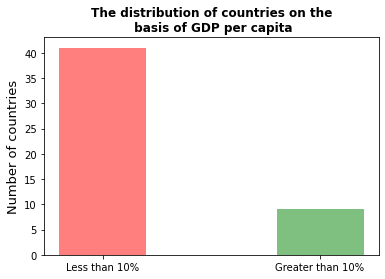

In [61]:
dat = dict()

level = 0.1 * df_new.gdpp.mean()
for k in df_label.gdpp:
    if(k < level):
        dat['Less than 10%'] = dat.get('Less than 10%', 0)+1
    else:
        dat['Greater than 10%'] = dat.get('Greater than 10%', 0)+1
plt.bar([0, 0.5], [dat['Less than 10%'], dat['Greater than 10%']],
        width=0.2, alpha=0.5, color=['r','g'])
plt.xticks([0, 0.5], ['Less than 10%', 'Greater than 10%'])
plt.ylabel("Number of countries", fontsize=13)
plt.title("The distribution of countries on the\n basis of GDP per capita",
          fontweight='bold')
plt.savefig(r'Final Cluster Histograms/histo_GDPp.png', dpi=200)

# Comparison of Fertility in females and Child Mortality Rate

In [62]:
df_label.sort_values('fertility_by_mortality', ascending=False)[:12]

,country,inflation,life_expec,gdpp,income_and_health,exports/imports,fertility_by_mortality
136,Solomon Islands,6.81,61.7,1290.0,15219.0,0.607143,0.150890
162,Vanuatu,2.62,63.0,2970.0,15487.5,0.884250,0.119863
52,Fiji,4.23,65.3,3650.0,35721.0,0.904538,0.110788
83,Kyrgyz Republic,10.00,68.5,880.0,17242.2,0.631579,0.104730
149,Timor-Leste,26.50,71.1,3600.0,16872.0,0.079137,0.099521
101,"Micronesia, Fed. Sts.",3.80,65.4,2860.0,47428.0,0.290123,0.086500
50,Eritrea,11.60,61.7,482.0,3777.2,0.205579,0.083514
155,Uganda,10.60,56.8,595.0,13875.4,0.597902,0.075926
129,Senegal,1.85,64.0,1000.0,12338.8,0.617866,0.075749
147,Tanzania,9.25,59.3,702.0,12560.9,0.642612,0.075522


In [63]:
print("Fertility Rate Statistics\n")
(df_new.fertility_by_mortality.describe())

Fertility Rate Statistics



count    117.000000
mean       0.216411
std        0.157142
min        0.037422
25%        0.104564
50%        0.163448
75%        0.281818
max        0.846154
Name: fertility_by_mortality, dtype: float64

- Again, the statistic derived from the **other dataframe** clearly highlights the differences in **Fertility in females and Child Mortality Rate** amongst the **clustered countries** and the **other countries**.
- From the data frame it is clear that the countries of this cluster is **10 times higher than the other countries**.
- It further strengthens the conclusion that these are the countries in **need of external help**

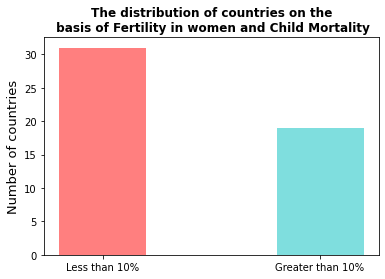

In [69]:
dat = dict()

level = 0.* df_new.fertility_by_mortality.mean()

for k in df_label.fertility_by_mortality:
    if(k < level):
        dat['Less than 10%'] = dat.get('Less than 10%', 0)+1
    else:
        dat['Greater than 10%'] = dat.get('Greater than 10%', 0)+1
plt.bar([0, 0.5], [dat['Less than 10%'], dat['Greater than 10%']],
        width=0.2, alpha=0.5, color=['r','c'])
plt.xticks([0, 0.5], ['Less than 10%', 'Greater than 10%'])
plt.ylabel("Number of countries", fontsize=13)
plt.title("The distribution of countries on the\n basis of Fertility in women and Child Mortality", fontweight='bold')
plt.savefig(r'Final Cluster Histograms/histo_fert_and_mortality.png', dpi=200)

## Shortlisting countries from dataset.
- Countries are shortlisted according to the above three classifiers and then the top **10** countries are extracted from each metric.
- Then, the union of these **counrty lists** provide the most **in need countries from the dataset**

In [65]:
inc_h = list(df_label.sort_values("income_and_health").country[:10])
gdp_p = list(df_label.sort_values("gdpp").country[:10])
fer_mort = list(df_label.sort_values(
    "fertility_by_mortality", ascending=False).country[:10])

In [66]:
print("Based on income and health:", inc_h, "\n")
print("Based on GDP per capita :", gdp_p, "\n")
print("Based on fertility by mortality :", fer_mort)

Based on income and health: ['Central African Republic', 'Eritrea', 'Niger', 'Mozambique', 'Congo, Dem. Rep.', 'Madagascar', 'Guinea', 'Comoros', 'Malawi', 'Benin'] 

Based on GDP per capita : ['Burundi', 'Liberia', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Madagascar', 'Mozambique', 'Central African Republic', 'Malawi', 'Eritrea'] 

Based on fertility by mortality : ['Solomon Islands', 'Vanuatu', 'Fiji', 'Kyrgyz Republic', 'Timor-Leste', 'Micronesia, Fed. Sts.', 'Eritrea', 'Uganda', 'Senegal', 'Tanzania']


## Top 2 Countries of each category
 - INCOME AND HEALTH - **'Central African Republic', 'Eritrea'**
 - GDP per capita - **'Burundi', 'Liberia'**
 - Fertility and Mortality - **'Solomon Islands', 'Vanuatu'**

In [67]:
final_list = list(set().union(inc_h, gdp_p, fer_mort))

In [205]:
final_list

['Guinea',
 'Liberia',
 'Kyrgyz Republic',
 'Central African Republic',
 'Comoros',
 'Malawi',
 'Solomon Islands',
 'Timor-Leste',
 'Micronesia, Fed. Sts.',
 'Eritrea',
 'Mozambique',
 'Benin',
 'Vanuatu',
 'Uganda',
 'Tanzania',
 'Congo, Dem. Rep.',
 'Sierra Leone',
 'Fiji',
 'Madagascar',
 'Senegal',
 'Niger',
 'Burundi']